# Análise exploratória hidrometros 

## População : Hidrometros com troca em **2017**

## [Seaborn | Gráficos](https://seaborn.pydata.org/)

## [Pandas | Data Munging](https://pandas.pydata.org/)

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
plt.style.use('fivethirtyeight')

In [177]:
df = pd.read_csv('../data/dataset_substituicoes_2017.csv',\
                 parse_dates=['REL_DAT_SUBSTITUICAO', 'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO'],\
                 decimal=',', thousands='.')

In [178]:
df.head(2)

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_SLG_UNIDADE_ADMIN_DES,REL_COD_UNIDADE_ADMIN_DES,REL_LGE_DSC_LOCAL,REL_QTD_RESIDENCIAL,REL_QTD_COMERCIAL,REL_QTD_INDUSTRIAL,REL_QTD_PUBLICA,...,REL_FLG_PROCESSADO,REL_DAT_SUBSTITUICAO,REL_NUM_SETOR,REL_NUM_QUADRA,REL_SEQ_MARCA_MEDIDOR,REL_SEQ_CAPACIDADE_MEDIDOR,REL_SEQ_MOTIVO_RETIRADA,REL_SEQ_SERVICO,REL_DAT_INS_ANTERIOR,REL_IDADE_MEDIDOR
0,1317755,UN-MTL,45,UN-MTL,45,FORTALEZA,1,0,0,0,...,1,2017-01-26,12,68,10,3,15,31051,2016-01-15,1.0
1,1317964,UN-MTL,45,UN-MTL,45,FORTALEZA,1,0,0,0,...,1,2017-01-25,23,215,10,3,3,31051,2009-11-30,8.0


### Valores nulos

In [179]:
a = 1-(df.count()/len(df))
a[a!=0]

REL_TIPO_TARIFA                   1.000000
REL_NUM_FAIXA                     1.000000
REL_SEQ_CFA_CODIGO_FATURAMENTO    0.609212
REL_IDADE_MEDIDOR                 0.000262
dtype: float64

In [23]:
del df['REL_TIPO_TARIFA']
del df['REL_NUM_FAIXA']

In [180]:
# Colunas a desconsiderar : REL_TIPO_TARIFA, REL_NUM_FAIXA.
# Eliminar as nulas em REL_SEQ_CFA_CODIGO_FATURAMENTO.
df[['REL_TIPO_TARIFA','REL_NUM_FAIXA', 'REL_SEQ_CFA_CODIGO_FATURAMENTO' ]].head(2)

,REL_TIPO_TARIFA,REL_NUM_FAIXA,REL_SEQ_CFA_CODIGO_FATURAMENTO
0,NaN,NaN,236616251.0
1,NaN,NaN,237489943.0


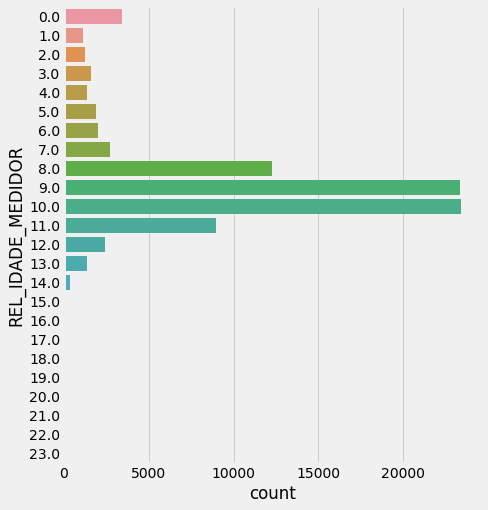

In [181]:
# A grande maioria de nossos hidrometros é trocado no periodo de 8 a 10 anos.
sns.catplot(y="REL_IDADE_MEDIDOR",
             height=7,
            kind="count", data=df);

In [182]:
# O que pode tornar a idade do medidor negativa?
# possivelmente, eliminar.
df[df['REL_IDADE_MEDIDOR'] < 0][['REL_SEQ_DESEMPENHO_MEDIDOR','REL_DAT_SUBSTITUICAO', 'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO','REL_IDADE_MEDIDOR']]

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_DAT_SUBSTITUICAO,REL_DAT_INS_ANTERIOR,REL_DAT_INSTALACAO,REL_IDADE_MEDIDOR


In [183]:
df.columns

Index(['REL_SEQ_DESEMPENHO_MEDIDOR', 'REL_SLG_UNIDADE_ADMIN',
       'REL_COD_UNIDADE_ADMIN', 'REL_SLG_UNIDADE_ADMIN_DES',
       'REL_COD_UNIDADE_ADMIN_DES', 'REL_LGE_DSC_LOCAL', 'REL_QTD_RESIDENCIAL',
       'REL_QTD_COMERCIAL', 'REL_QTD_INDUSTRIAL', 'REL_QTD_PUBLICA',
       'REL_NOM_CLIENTE', 'REL_ENDERECO', 'REL_CODIFICACAO', 'REL_NUM_MEDIDOR',
       'REL_NUM_MEDIDOR_ANT', 'REL_INSCRICAO', 'REL_DAT_INSTALACAO',
       'REL_VLR_MEDIO_ATUAL_3', 'REL_VLR_MEDIO_ATUAL_6',
       'REL_VLR_MEDIO_ATUAL_12', 'REL_VLR_MEDIO_ATUAL_24',
       'REL_VLR_MEDIO_ATUAL_1MES_3', 'REL_VLR_MEDIO_ATUAL_1MES_6',
       'REL_VLR_MEDIO_ATUAL_1MES_12', 'REL_VLR_MEDIO_ATUAL_1MES_24',
       'REL_VLR_MEDIO_ANT_3', 'REL_VLR_MEDIO_ANT_6', 'REL_VLR_MEDIO_ANT_12',
       'REL_VLR_MEDIO_ANT_24', 'REL_VLR_MEDIO_ANT_1MES_3',
       'REL_VLR_MEDIO_ANT_1MES_6', 'REL_VLR_MEDIO_ANT_1MES_12',
       'REL_VLR_MEDIO_ANT_1MES_24', 'REL_VOLUME_MEDIO_3', 'REL_VOLUME_MEDIO_6',
       'REL_VOLUME_MEDIO_12', 'REL_VOLUME_MEDIO

In [184]:
df.shape

(87774, 74)

In [185]:
# Reduzir amostra para fortaleza , para adcionar setores de abastecimento
# Fortaleza representa mais de 50% das trocas efetuadas no ano.
# Total Municipios
#set(df['REL_LGE_DSC_LOCAL'])
len(set(df['REL_LGE_DSC_LOCAL']))

255

In [186]:
df3 = df.groupby(['REL_LGE_DSC_LOCAL'])['REL_LGE_DSC_LOCAL'].count().sort_values()/len(df)
df3[df3>0.04]

REL_LGE_DSC_LOCAL
CAUCAIA      0.050550
MARACANAU    0.051895
FORTALEZA    0.508123
Name: REL_LGE_DSC_LOCAL, dtype: float64

In [187]:
df2 = df.groupby(['REL_LGE_DSC_LOCAL'])['REL_LGE_DSC_LOCAL'].count().sort_values()
df2[df2>2447]

REL_LGE_DSC_LOCAL
CAUCAIA       4437
MARACANAU     4555
FORTALEZA    44600
Name: REL_LGE_DSC_LOCAL, dtype: int64

In [53]:
#Exportar
df[df['REL_LGE_DSC_LOCAL'] == 'FORTALEZA']['REL_INSCRICAO'].to_csv('inscricoes_fortaleza.csv')

In [188]:
# Populacao amostral das trocas efetuadas em fortaleza
# Residenciais nao mistos
# servico 44349 = 336
df_ = df[(df['REL_LGE_DSC_LOCAL'] == 'FORTALEZA')&\
   (df['REL_QTD_RESIDENCIAL'] > 0)&\
   (df['REL_QTD_COMERCIAL'] == 0)&\
   (df['REL_QTD_INDUSTRIAL'] == 0)&\
   (df['REL_QTD_PUBLICA'] == 0)&\
   (df['REL_SEQ_SERVICO'] == 44349)
  ].copy()
df_.shape

(32172, 74)

In [97]:
df_['REL_INSCRICAO'].to_csv('inscricoes_fortaleza.csv')

In [192]:
#df_.to_csv('dataset_substituicoes_2017_AMOSTRA1.csv')
df_ = pd.read_csv('dataset_substituicoes_2017_AMOSTRA1.csv',\
                 parse_dates=['REL_DAT_SUBSTITUICAO', 'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO'],\
                 decimal=',', thousands='.')

In [194]:
df_.drop(columns=['REL_QTD_PUBLICA',\
                  'REL_QTD_INDUSTRIAL',\
                  'REL_QTD_COMERCIAL',\
                  'REL_NOM_CLIENTE',\
                  'REL_ENDERECO',\
                  'REL_SEQ_SERVICO',\
                  'REL_LGE_DSC_LOCAL',\
                  'REL_TIPO_TARIFA',\
                  'REL_CODIFICACAO',\
                  'REL_COD_UNIDADE_ADMIN_DES',\
                  'REL_SLG_UNIDADE_ADMIN_DES',\
                  'REL_SEQ_CFA_CODIGO_FATURAMENTO',\
                  'REL_FLG_PROCESSADO',\
                  'REL_NUM_FAIXA']
         ,inplace=True)
df_.shape

KeyError: "['REL_QTD_PUBLICA' 'REL_QTD_INDUSTRIAL' 'REL_QTD_COMERCIAL'\n 'REL_NOM_CLIENTE' 'REL_ENDERECO' 'REL_SEQ_SERVICO' 'REL_LGE_DSC_LOCAL'\n 'REL_TIPO_TARIFA' 'REL_CODIFICACAO' 'REL_NUM_FAIXA'] not found in axis"

In [191]:
df_.head(2)

,Unnamed: 0,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_SLG_UNIDADE_ADMIN_DES,REL_COD_UNIDADE_ADMIN_DES,REL_QTD_RESIDENCIAL,REL_NUM_MEDIDOR,REL_NUM_MEDIDOR_ANT,REL_INSCRICAO,...,REL_SEQ_CFA_CODIGO_FATURAMENTO,REL_FLG_PROCESSADO,REL_DAT_SUBSTITUICAO,REL_NUM_SETOR,REL_NUM_QUADRA,REL_SEQ_MARCA_MEDIDOR,REL_SEQ_CAPACIDADE_MEDIDOR,REL_SEQ_MOTIVO_RETIRADA,REL_DAT_INS_ANTERIOR,REL_IDADE_MEDIDOR
0,95,1371049,UN-MTL,45,UN-MTL,45,3,A16F260231,A07S089979,2019957,...,2.368398e+09,1,2017-01-21,46,43,10,3,2,2007-04-19,100.0
1,164,1364626,UN-MTL,45,UN-MTL,45,1,A17F000595,A08F499040,53155,...,NaN,1,2017-02-07,2,64,10,3,2,2009-02-16,80.0


In [152]:
df_.describe()

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_COD_UNIDADE_ADMIN,REL_QTD_RESIDENCIAL,REL_INSCRICAO,REL_VLR_MEDIO_ATUAL_3,REL_VLR_MEDIO_ATUAL_6,REL_VLR_MEDIO_ATUAL_12,REL_VLR_MEDIO_ATUAL_24,REL_VLR_MEDIO_ATUAL_1MES_3,REL_VLR_MEDIO_ATUAL_1MES_6,...,REL_LGE_COD_SIG,REL_SEQ_INSTALACAO,REL_SEQ_INSTALACAO_ANT,REL_FLG_PROCESSADO,REL_NUM_SETOR,REL_NUM_QUADRA,REL_SEQ_MARCA_MEDIDOR,REL_SEQ_CAPACIDADE_MEDIDOR,REL_SEQ_MOTIVO_RETIRADA,REL_IDADE_MEDIDOR
count,3.217200e+04,32172.000000,32172.000000,3.217200e+04,32172.000000,32172.000000,32172.000000,32172.000000,32172.000000,32172.000000,...,32172.0,3.217200e+04,3.217200e+04,32172.0,32172.000000,32172.000000,32172.000000,32172.000000,32172.000000,32150.000000
mean,1.860421e+06,61.256621,1.647426,5.292229e+06,66.227014,67.601073,68.960051,69.622756,65.399986,66.971307,...,1.0,3.013931e+08,6.437222e+06,1.0,44.141831,212.298987,9.943336,3.045257,2.013366,9.335023
std,1.525756e+05,27.685739,5.814258,3.152288e+06,234.374786,235.566195,237.605682,237.958945,234.183858,234.478994,...,0.0,1.207403e+05,1.862299e+07,0.0,21.376179,163.792485,0.760689,0.373507,0.121671,1.070626
min,1.364399e+06,45.000000,1.000000,2.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,3.012175e+08,2.130000e+02,1.0,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000
25%,1.893494e+06,45.000000,1.000000,2.708214e+06,23.837500,24.700000,25.950000,26.590000,23.100000,24.310000,...,1.0,3.013007e+08,2.717586e+06,1.0,28.000000,88.000000,10.000000,3.000000,2.000000,9.000000
50%,1.911316e+06,48.000000,1.000000,5.088103e+06,33.670000,34.800000,36.140000,36.790000,32.710000,34.170000,...,1.0,3.013594e+08,5.097580e+06,1.0,45.000000,171.000000,10.000000,3.000000,2.000000,9.000000
75%,1.930705e+06,51.000000,1.000000,7.784840e+06,52.432500,53.622500,54.562500,55.010000,51.290000,52.870000,...,1.0,3.014703e+08,7.831872e+06,1.0,62.000000,311.000000,10.000000,3.000000,2.000000,10.000000
max,2.099100e+06,117.000000,240.000000,1.447884e+07,9576.270000,9156.200000,9156.200000,9156.200000,9961.620000,9038.080000,...,1.0,3.016427e+08,3.015552e+08,1.0,95.000000,890.000000,12.000000,8.000000,4.000000,17.000000


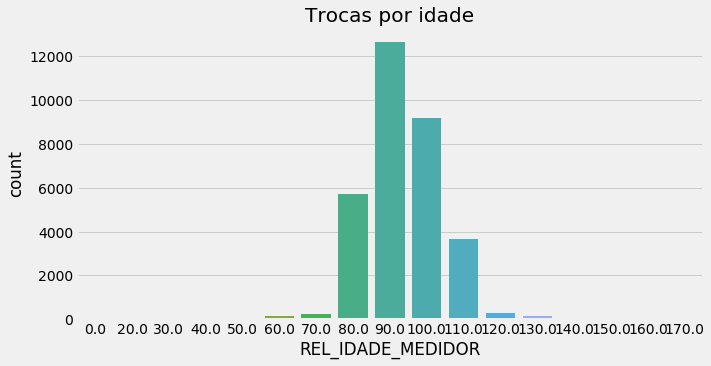

In [195]:
plt.figure(figsize=(10, 5))
plt.title("Trocas por idade")
sns.countplot(x='REL_IDADE_MEDIDOR', data=df_, orient="h")

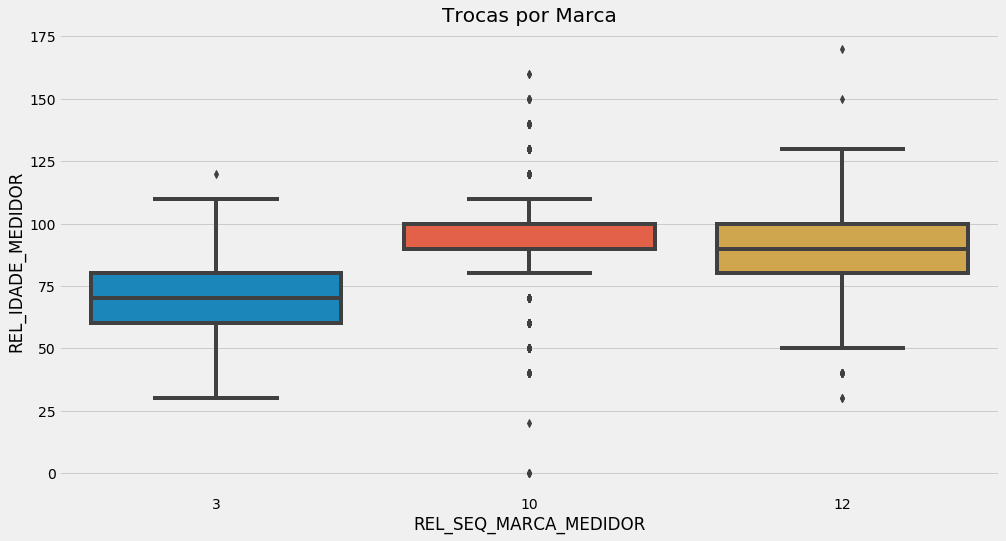

In [196]:
plt.figure(figsize=(15, 8))
plt.title("Trocas por Marca")
sns.boxplot(x="REL_SEQ_MARCA_MEDIDOR", y="REL_IDADE_MEDIDOR", data=df_)

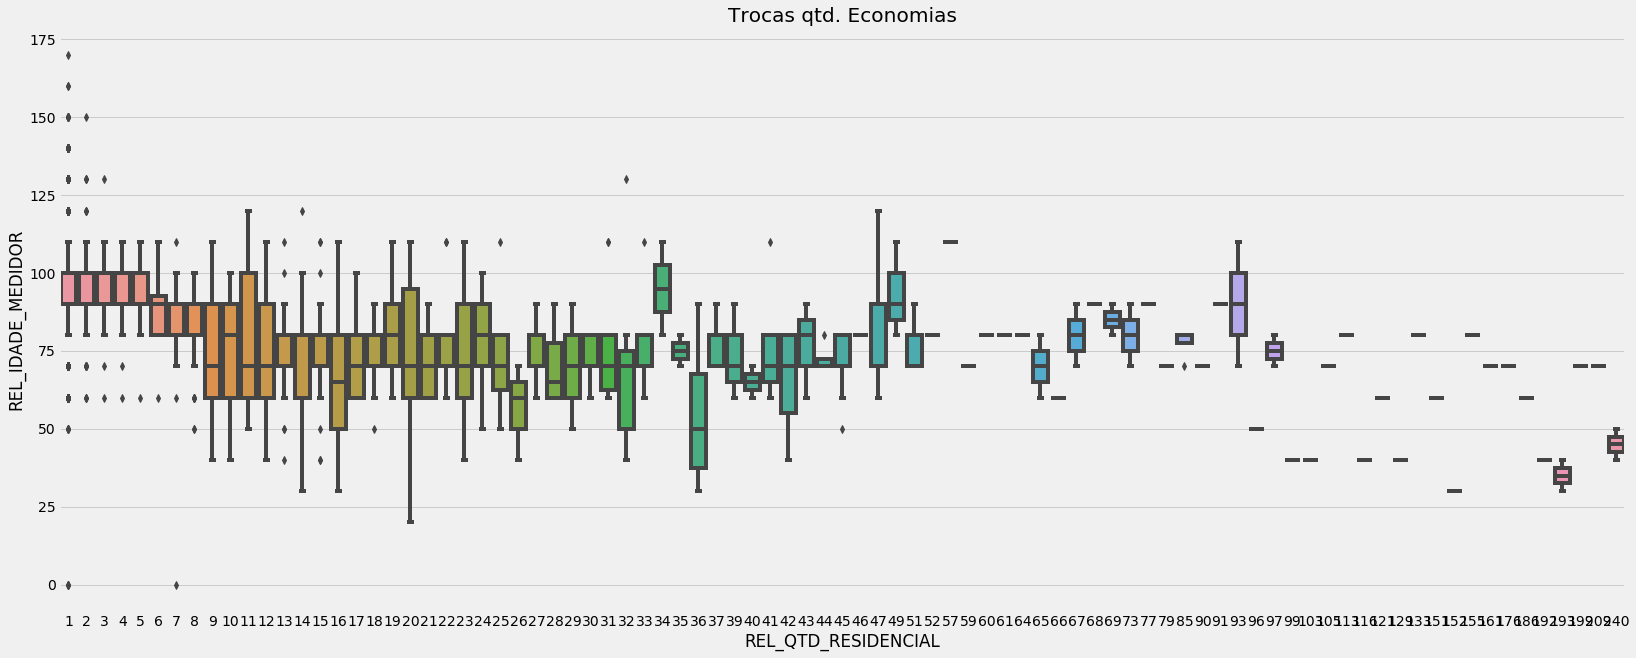

In [197]:
plt.figure(figsize=(25, 10))
plt.title("Trocas qtd. Economias")
sns.boxplot(x="REL_QTD_RESIDENCIAL", y="REL_IDADE_MEDIDOR", data=df_)

In [198]:
#Resumo estatistico da coluna
df_['REL_QTD_RESIDENCIAL'].describe()

count    32172.000000
mean         1.647426
std          5.814258
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        240.000000
Name: REL_QTD_RESIDENCIAL, dtype: float64

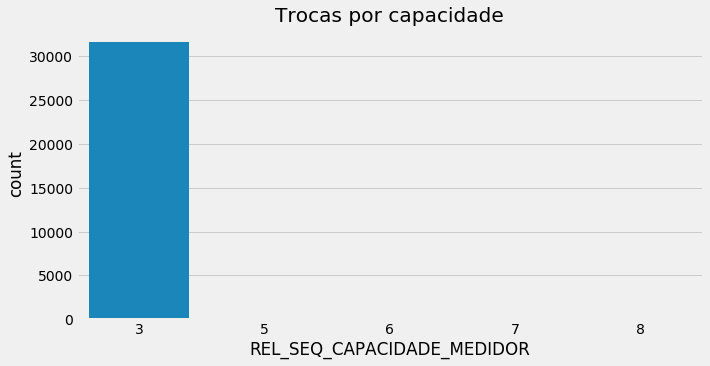

In [199]:
plt.figure(figsize=(10, 5))
plt.title("Trocas por capacidade")
sns.countplot(x='REL_SEQ_CAPACIDADE_MEDIDOR', data=df_, orient="h")

In [200]:
df_.groupby('REL_SEQ_CAPACIDADE_MEDIDOR')['REL_SEQ_CAPACIDADE_MEDIDOR'].count()

REL_SEQ_CAPACIDADE_MEDIDOR
3    31667
5      201
6      172
7      122
8       10
Name: REL_SEQ_CAPACIDADE_MEDIDOR, dtype: int64

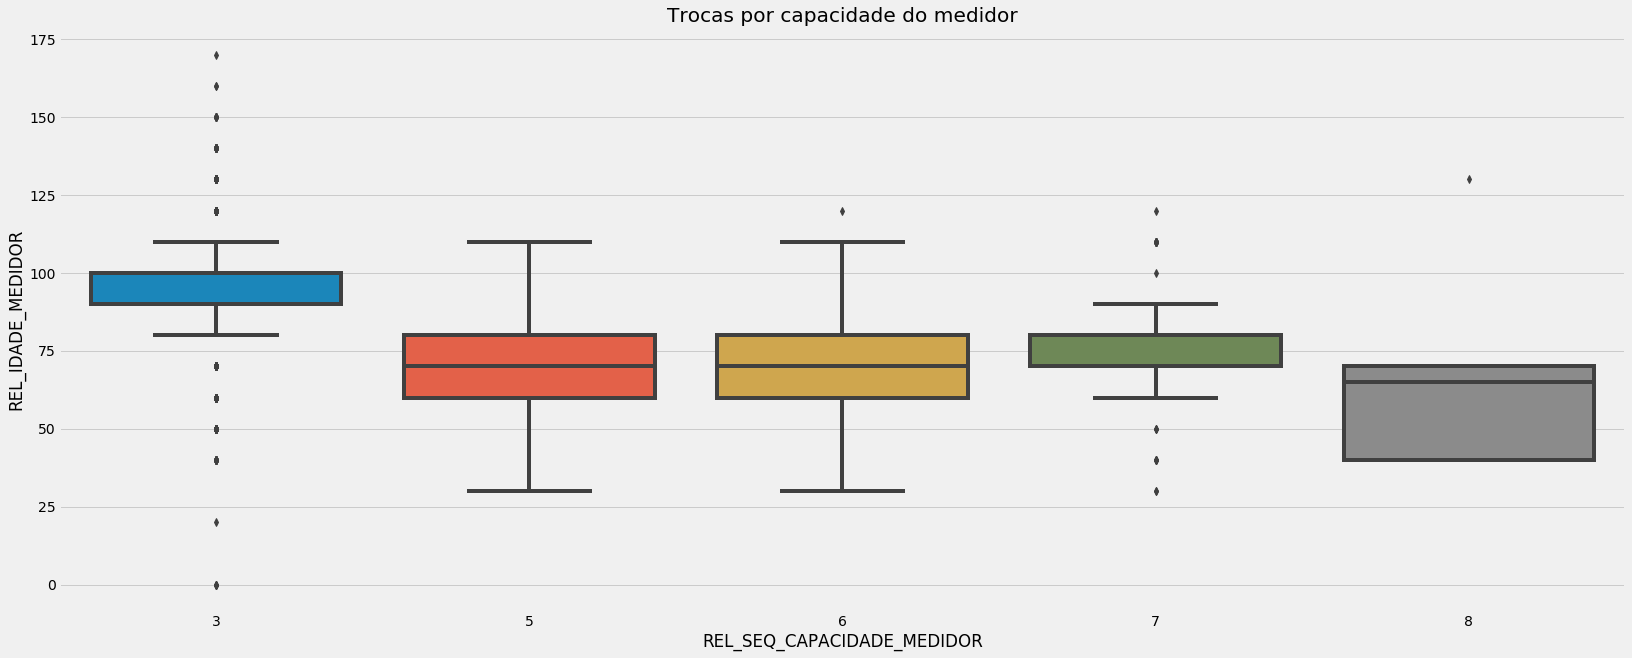

In [202]:
plt.figure(figsize=(25, 10))
plt.title("Trocas por capacidade do medidor")
sns.boxplot(x="REL_SEQ_CAPACIDADE_MEDIDOR", y="REL_IDADE_MEDIDOR", data=df_)